In [15]:
import numpy as np
np.float = np.float32
np.bool = bool

In [22]:
import os
import pyoints
import plyfile

In [17]:
from pyoints import (
    storage,
    Extent,
    transformation,
    filters,
    registration,
    normals,
)

In [18]:
A = storage.loadPly('../data/bunny/data/bun000.ply')

In [19]:
A.coords.shape

(20128, 3)

In [65]:
f = open('../data/bunny/data/bun000.ply', 'rb')
ply000 = plyfile.PlyData.read(f)
f.close()
bun0 = np.concatenate([ply000['vertex']['x'][:, np.newaxis],
                       ply000['vertex']['y'][:, np.newaxis],
                       ply000['vertex']['z'][:, np.newaxis]], axis=1)
bun0 = bun0[::11]

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

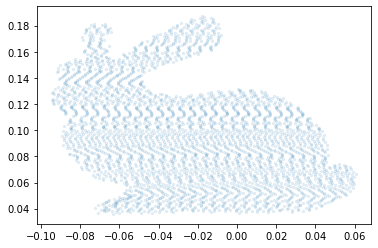

In [67]:
plt.scatter(bun0[:, 0], bun0[:, 1], s=5, alpha=0.1)

In [68]:
f = open('../data/bunny/data/bun090.ply', 'rb')
ply090 = plyfile.PlyData.read(f)
f.close()
bun90 = np.concatenate([ply090['vertex']['x'][:, np.newaxis],
                       ply090['vertex']['y'][:, np.newaxis],
                       ply090['vertex']['z'][:, np.newaxis]], axis=1)
bun90 = bun90[::11]

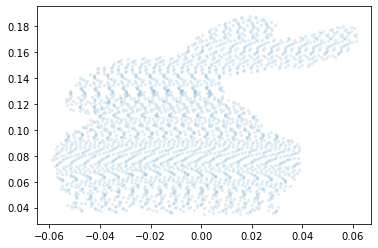

In [69]:
plt.scatter(bun90[:, 0], bun90[:, 1], s=5, alpha=0.1)

In [70]:
coords_dict = {
    'A': bun0,
    'B': bun90
}

In [78]:
d_th = 0.04
radii = [d_th, d_th, d_th]
icp = registration.ICP(
    radii,
    max_iter=60,
    max_change_ratio=0.00001,
    k=1
)

In [80]:
%timeit T_dict, pairs_dict, report = icp(coords_dict)

3.16 s ± 32.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
T_dict

{'A': LocalSystem([[ 0.99870706,  0.01014034,  0.04981357,  0.00405154],
              [-0.02338319,  0.9617202 ,  0.27303384, -0.00666301],
              [-0.04513806, -0.27384562,  0.96071387,  0.01791798],
              [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'B': LocalSystem([[ 0.93491403, -0.34267983,  0.09222952,  0.02507672],
              [ 0.3310778 ,  0.93581775,  0.12096542,  0.01322663],
              [-0.12776243, -0.08255712,  0.98836283,  0.0160413 ],
              [ 0.        ,  0.        ,  0.        ,  1.        ]])}

In [61]:
pairs_dict

{'A': {'B': (array([[ 1845,     0],
          [ 1845,     1],
          [ 1847,     2],
          ...,
          [39877, 30376],
          [39877, 30377],
          [39877, 30378]]),
   array([0.99666657, 0.99767584, 0.99830275, ..., 0.93494318, 0.93450925,
          0.93420995]))},
 'B': {'A': (array([[ 4323,     0],
          [ 4323,     1],
          [ 4323,     2],
          ...,
          [27135, 40253],
          [27268, 40254],
          [27265, 40255]]),
   array([0.9506293 , 0.95092663, 0.95067699, ..., 0.98400277, 0.98755486,
          0.9787486 ]))}}